## Table of Contents

* [Homework# 1](#Homework#1)
    * [Initialisation Package Import/Install](#Import_Packages)
    * [Load Data into DataFrame](#Data_Load)
    * [DataFrame Statisitics](#DataFrame_Statistics)
    * [DataFrame Formating](#DataFrame_Formating)
    * [KNeighbors Classifier](#KNeighborsClassifier)
    * [Dataset Predictions](#Predictions)
* [Homework# 2](#Homework#2)
    * [Histogram Plots](#Histograms)
    * [Mean and STD](#Mean_STD)
    * [Median and IQR](#Median_IQR)
    * [Bootstrap method](#Bootstrap)
* [Homework# 3](#Homework#3)
    * [Load model data](#Data_model_load)
    * [Calculate data model](#Calculate_data_model)
    * [Calculate model TP TN FP FN](#Calculate_TP_TN_FP_FN)
    * [Calculate model accuracy](#Model_Accuracy)
    * [Calculate model precision](#Model_Precission)
    * [Confusion Matrix](#Confusion_Matrix)

* Author: Gerti Kulla
* Class: Brooklyn College/Cisc7700X 
* Semester: Fall 2024

# Homework#1

CISC 7700X HW# 1 (due by 2nd class;): Using the Iris dataset, build a kNN model to identify the IRIS species of a flower given sepal_length, sepal_width, petal_length,petal_width. Feel free to use whatever language/tool you are comfortable with. I encourage you to write C/C++/Java/C#/SQL/Python code. You may also use Excel, or Weka or Colab or whatever other library/tool you find. Submit (via email), the model code.

## Import_Packages

In [62]:
!pip install seaborn scipy
!pip install -U scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind
from scipy.stats import bootstrap

## Data_Load

In [2]:
#Reading excel data into DataFrame

df = pd.read_csv(r'http://theparticle.com/cs/bc/dsci/iris.csv')

#Creating a new df with 3 row values to use for test predictions
PredictionSet = df.iloc[[47]]
PredictionSet = pd.concat([df.iloc[[82]], PredictionSet], axis=0, ignore_index=True)
PredictionSet = pd.concat([df.iloc[[147]], PredictionSet], axis=0, ignore_index=True)

#Respective record indexes are removed
df = df.drop(df.index[[47,82,147]])

## DataFrame_Statistics

In [3]:
df.describe().loc[['mean','std','25%', '75%']]

,sepal_length,sepal_width,petal_length,petal_width
mean,5.847619,3.055782,3.763946,1.200000
std,0.828378,0.436852,1.767668,0.763643
25%,5.100000,2.800000,1.600000,0.300000
75%,6.400000,3.300000,5.100000,1.800000


## DataFrame_Formating

In [8]:
#keeping values with no headers actual values [X] and target values [Y]
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][1:]
Y = df['species'][1:] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

## KNeighborsClassifier

In [9]:
model = KNeighborsClassifier(n_neighbors=8).fit(X_train,Y_train)
model

KNeighborsClassifier(n_neighbors=8)

In [10]:
model.score(X_train, Y_train)

0.9827586206896551

In [41]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,119.000000,119.000000,119.000000,119.000000
mean,5.815126,3.036975,3.753782,1.196639
std,0.826124,0.441274,1.747870,0.747417
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.300000,3.300000,5.050000,1.800000
max,7.900000,4.400000,6.700000,2.500000


## Predictions

In [11]:
print(f"Original: {PredictionSet.iloc[[0]]['species']}")

prediction1 = model.predict([[6.5,3.0,5.2,2.0]])
print(f"Prediction: {prediction1}")

Original: 0    virginica
Name: species, dtype: object
Prediction: ['virginica']


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [12]:
print(f"Original: {PredictionSet.iloc[[1]]['species']}")
      
prediction2 = model.predict([[5.8,2.7,3.9,1.2]])
print(f"Prediction: {prediction2}")

Original: 1    versicolor
Name: species, dtype: object
Prediction: ['versicolor']


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
print(f"Original: {PredictionSet.iloc[[2]]['species']}")
      
prediction3 = model.predict([[4.6,3.2,1.4,0.2]])
print(f"Prediction: {prediction3}")

Original: 2    setosa
Name: species, dtype: object
Prediction: ['setosa']


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


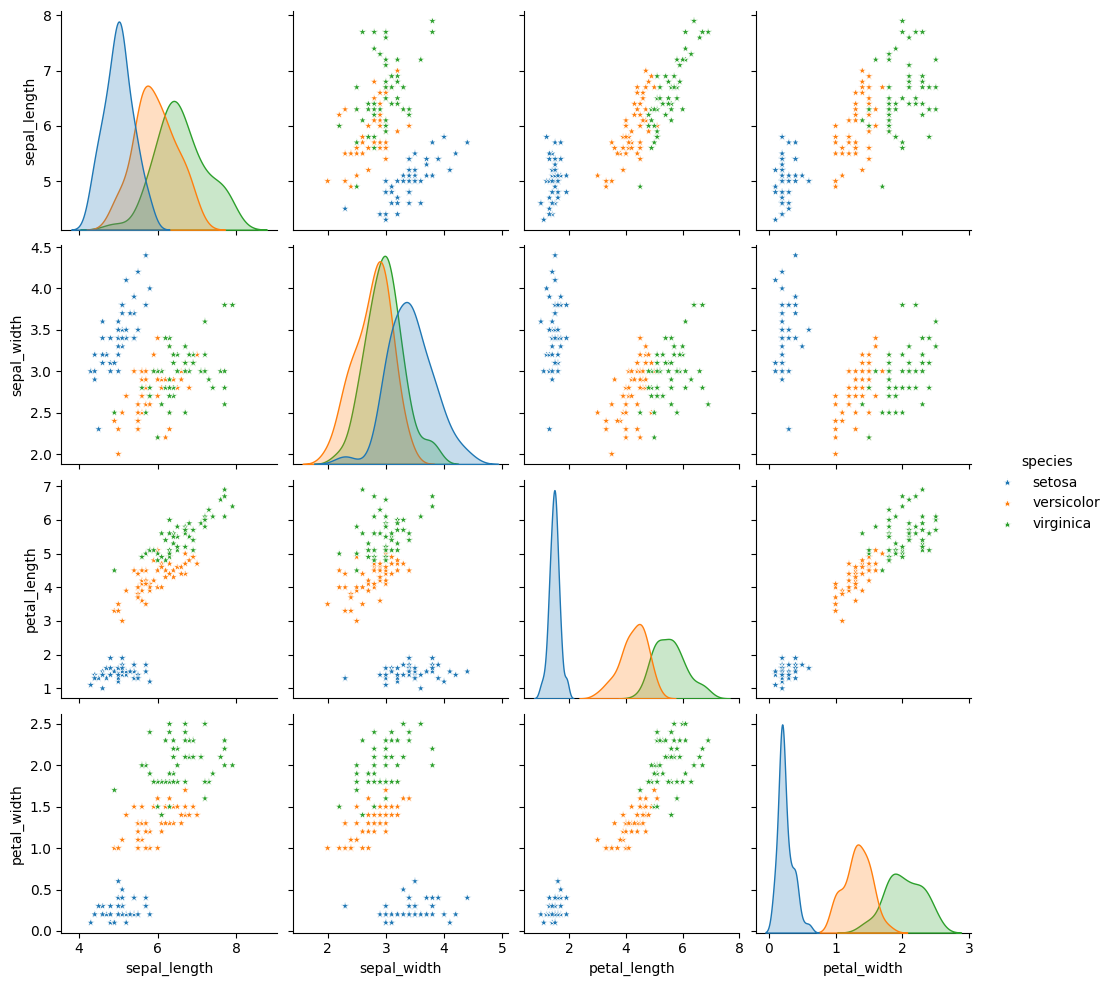

In [15]:
g = sns.pairplot(df, hue='species', markers='*')
plt.show()

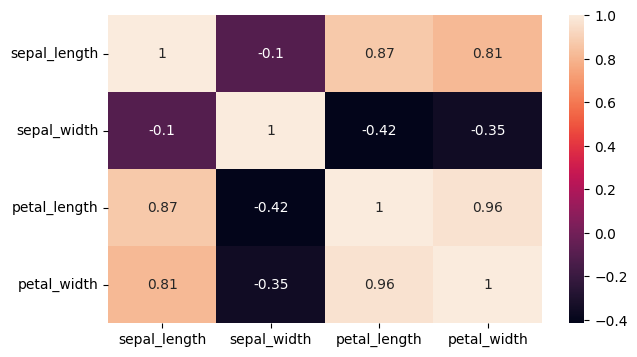

In [27]:
plt.figure(figsize=(7,4)) 
sns.heatmap(X.corr(), annot=True)
plt.show()

# Homework#2

CISC 7700X HW# 2: Continuing with the Iris dataset, plot the histograms for each of the attributes: sepal_length, sepal_width, petal_length, petal_width. Find the average and standard deveation for sepal_length, sepal_width, petal_length, petal_width for each label. Find the median and IQR for sepal_length, sepal_width, petal_length, petal_width for each label. Use bootstrap method to find error bounds on all of the above.

## Histograms

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

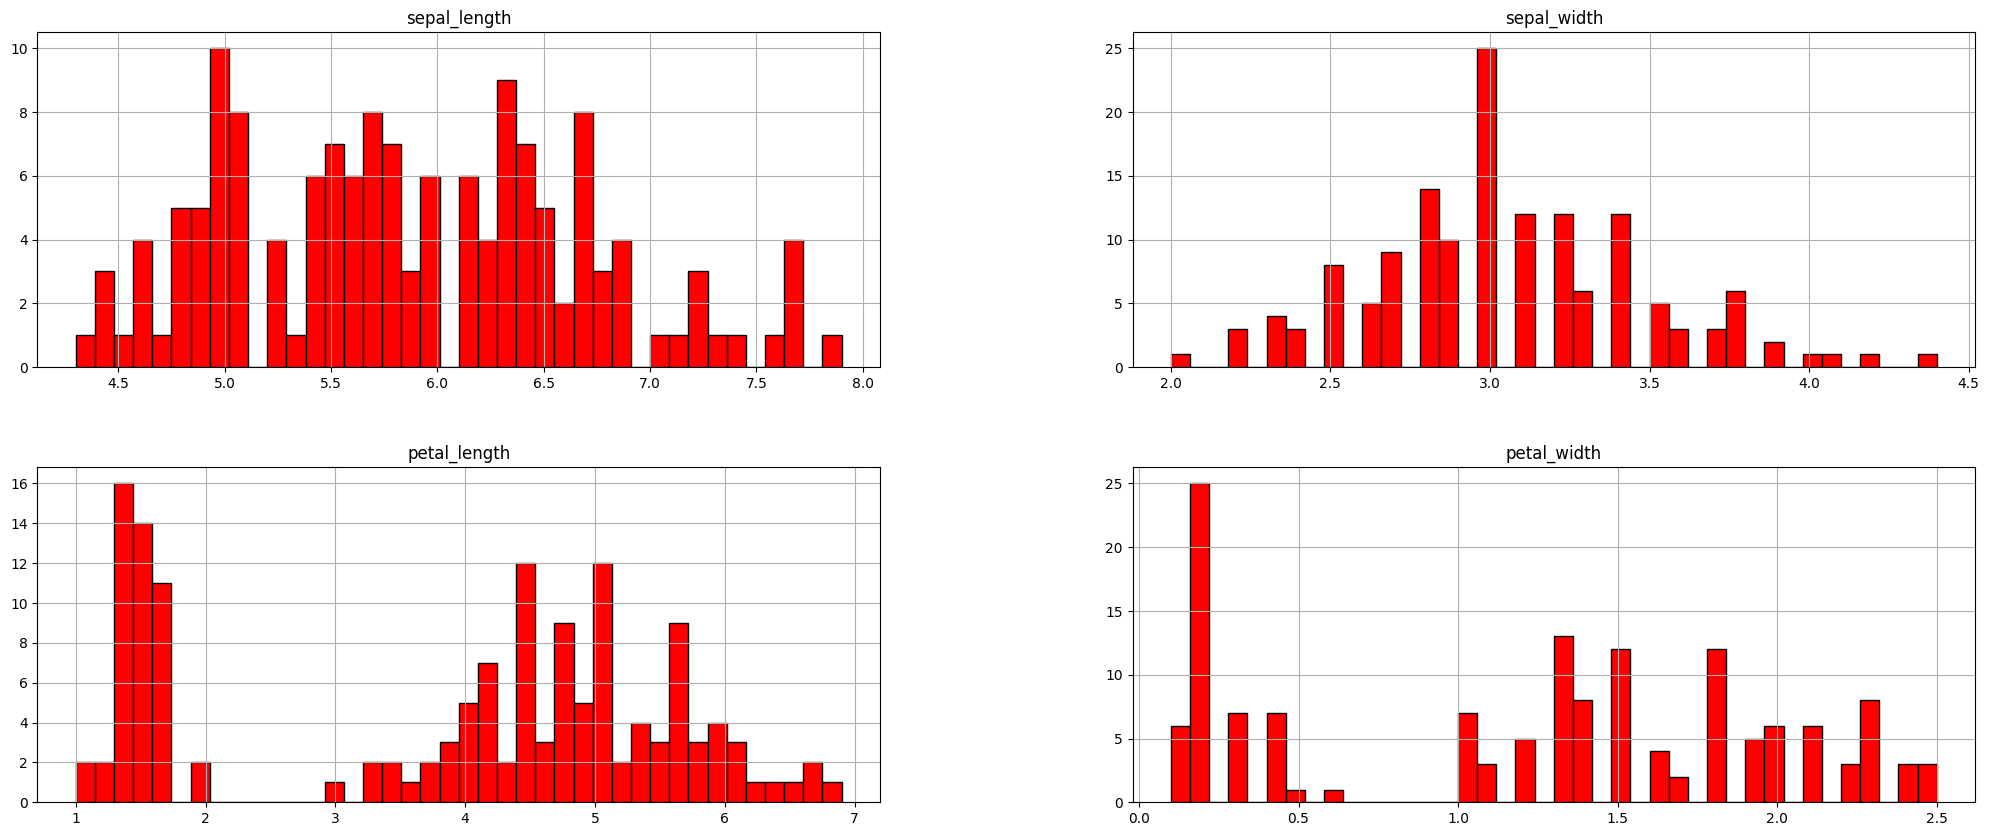

In [18]:
df_noHeader=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][1:]
fig, axis = plt.subplots(2, 2, figsize = (25, 10))
df_noHeader.hist(ax=axis, edgecolor='black', grid=True, bins = 40, color = "red")

## Mean_STD

In [95]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

X_data = df[1:][['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y_data = df[1:][['species']]
df_tot = pd.concat([X_data, Y_data], axis=1)

df_tot1 = df_tot.groupby('species').agg({'sepal_length': ['mean', 'std', 'median', q1, q3]})
df_tot2 = df_tot.groupby('species').agg({'sepal_width': ['mean', 'std', 'median', q1, q3]})
df_tot3 = df_tot.groupby('species').agg({'petal_length': ['mean', 'std', 'median', q1, q3]})
df_tot4 = df_tot.groupby('species').agg({'petal_width': ['mean', 'std', 'median', q1, q3]})
print(df_tot1, df_tot2, df_tot3, df_tot4)

           sepal_length                             
                   mean       std median     q1   q3
species                                             
setosa         5.004082  0.355879    5.0  4.800  5.2
versicolor     5.936000  0.516171    5.9  5.600  6.3
virginica      6.588000  0.635880    6.5  6.225  6.9            sepal_width                               
                  mean       std median     q1     q3
species                                              
setosa        3.416327  0.384787    3.4  3.100  3.700
versicolor    2.770000  0.313798    2.8  2.525  3.000
virginica     2.974000  0.322497    3.0  2.800  3.175            petal_length                             
                   mean       std median   q1     q3
species                                             
setosa         1.465306  0.175061   1.50  1.4  1.600
versicolor     4.260000  0.469911   4.35  4.0  4.600
virginica      5.552000  0.551895   5.55  5.1  5.875            petal_width                  

In [96]:
X_data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][1:]#).apply(pd.to_numeric)

col_median = X_data.median()
col_std = X_data.std()
col_mean = X_data.mean()
col_quantile_25 = X_data.quantile(0.25)
col_quantile_75 = X_data.quantile(0.75)
IQR = col_quantile_75 - col_quantile_25
IQR

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

In [19]:
print(round(X['sepal_length'].describe().loc[['mean','std']],4))

mean    5.8626
std     0.8250
Name: sepal_length, dtype: float64


In [20]:
print(round((X['sepal_width'].describe().loc[['mean','std']]),4))

mean    3.0503
std     0.4363
Name: sepal_width, dtype: float64


In [21]:
print(round((X['petal_length'].describe().loc[['mean','std',]]),4))

mean    3.8075
std     1.7485
Name: petal_length, dtype: float64


In [22]:
print(round((X['petal_width'].describe().loc[['mean','std']]),4))

mean    1.2190
std     0.7573
Name: petal_width, dtype: float64


## Median_IQR

In [24]:
print(round(X['sepal_length'].median(),4))

5.8


In [26]:
Q1_SL = X['sepal_length'].quantile(0.25)
Q3_SL = X['sepal_length'].quantile(0.75)
IQR_SL = Q3_SL - Q1_SL
print(round(IQR_SL,2))

1.3


In [27]:
print(round(X['sepal_width'].median(),4))

3.0


In [29]:
Q1_SL = X['sepal_width'].quantile(0.25)
Q3_SL = X['sepal_width'].quantile(0.75)
IQR_SL = Q3_SL - Q1_SL
print(round(IQR_SL,2))

0.5


In [32]:
print(round(X['petal_length'].median(),4))

4.4


In [31]:
Q1_SL = X['petal_length'].quantile(0.25)
Q3_SL = X['petal_length'].quantile(0.75)
IQR_SL = Q3_SL - Q1_SL
print(round(IQR_SL,2))

3.5


In [33]:
print(round(X['petal_width'].median(),4))

1.3


In [34]:
Q1_SL = X['petal_width'].quantile(0.25)
Q3_SL = X['petal_width'].quantile(0.75)
IQR_SL = Q3_SL - Q1_SL
print(round(IQR_SL,2))

1.5


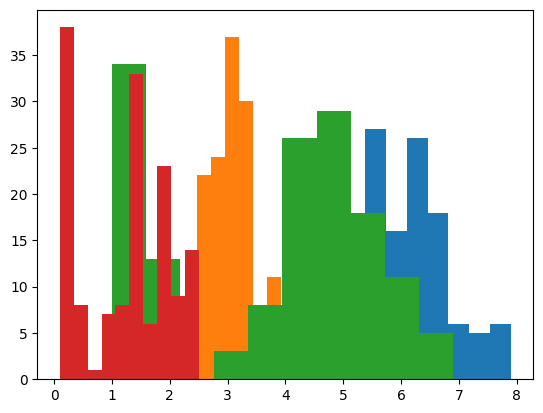

In [35]:
# Plot histogram of versicolor petal lengths
hist_sepal_length = plt.hist(X['sepal_length'])
hist_sepal_width = plt.hist(X['sepal_width'])
hist_petal_length = plt.hist(X['petal_length'])
hist_petal_width = plt.hist(X['petal_width'])

#_ = plt.plot(X, Y, marker = '.', linestyle = 'none')

# Show histogram
plt.show()

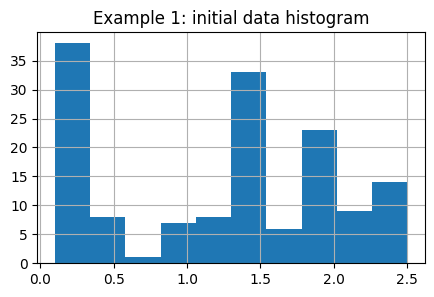

In [36]:

X['petal_width'].hist(figsize=(5, 3))
plt.title("Example 1: initial data histogram")
plt.show()

(array([6.143e+03, 3.315e+03, 5.130e+02, 7.000e+00, 8.000e+00, 3.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 7.000e+00]),
 array([0.2 , 0.28, 0.36, 0.44, 0.52, 0.6 , 0.68, 0.76, 0.84, 0.92, 1.  ]),
 <BarContainer object of 10 artists>)

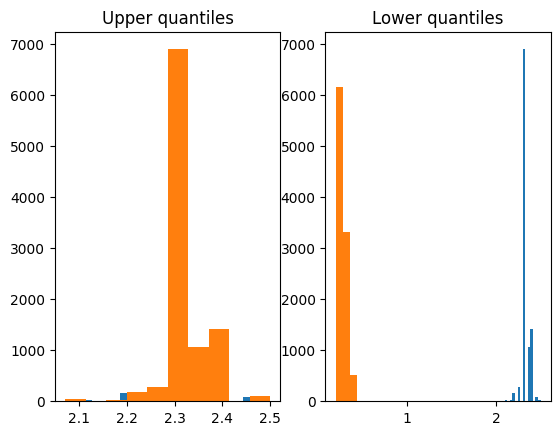

In [55]:
upper_quantiles = []
lower_quantiles = []

x = X['petal_width']
subsample = x.sample(frac=1, replace=True)
#print(subsample.quantile(0.99))

for i in range(10000):
    subsample = x.sample(frac=1, replace=True)
    upper_quantiles.append(subsample.quantile(0.95))
    lower_quantiles.append(subsample.quantile(0.2))

upper_quantiles = pd.Series(upper_quantiles)
lower_quantiles = pd.Series(lower_quantiles)

#fig, axis = plt.subplots(1, 2, figsize = (10, 7))
#upper_quantiles.hist(ax=axis, edgecolor='black', grid=True, bins = 40, color = "red")
plt.subplot(1,2,1)
plt.hist(upper_quantiles, bins = 15)
plt.title('Upper quantiles')
plt.hist(upper_quantiles) 

plt.subplot(1,2,2)
plt.hist(upper_quantiles, bins = 15)
plt.title('Lower quantiles')
plt.hist(lower_quantiles) 

#plt.plot(lower_quantiles)

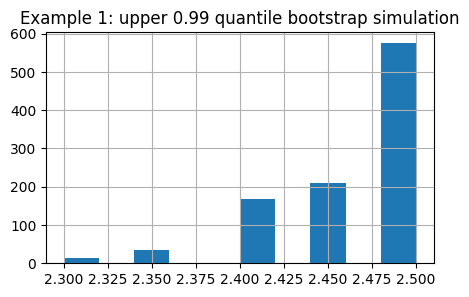

In [14]:
upper_quantiles.hist(figsize=(5, 3))
plt.title("Example 1: upper 0.99 quantile bootstrap simulation")
plt.show()

In [41]:
# upper 0.99 quantile lies in this interval with 95% confidence
print(f'{upper_quantiles.quantile(0.025):.2f}') # Out: 94.89
print(f'{upper_quantiles.quantile(0.975):.2f}') # Out: 98.69

# lower 0.01 quantile lies in this interval with 95% confidence
print(f'{lower_quantiles.quantile(0.025):.2f}') # Out: 0.55
print(f'{lower_quantiles.quantile(0.975):.2f}') # Out: 4.62

2.27
2.40
0.20
0.40


In [34]:
#print(x)
data = x.to_numpy()
print(x.describe())
data = (data,)

#calculate 95% bootstrapped confidence interval for median
bootstrap_ci = bootstrap(data, np.std, confidence_level=0.95,random_state=1, method='percentile')

#view 95% boostrapped confidence interval
print(bootstrap_ci.confidence_interval)

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64
ConfidenceInterval(low=np.float64(0.707022630453654), high=np.float64(0.8071304451837964))


# Homework#3

CISC 7700X HW# 3: We have a labeled training data set: hw3.data1.csv.gz.
Thinking of a linear model, we come up with:

y = 24*column1 + -15*column2 + -38*column3 + -7*column4 + -41*column5 + 35*column6 + 0*column7 + -2*column8 + 19*column9 + 33*column10 + -3*column11 + 7*column12 + 3*column13 + -47*column14 + 26*column15 + 10*column16 + 40*column17 + -1*column18 + 3*column19 + 0*column20 + -6

if y is > 0 then 1 othewise -1.

What is the accuracy? Calculate the confusion matrix for this model. If cost of a false negative is $1000, and cost of a false positive is $100, (and $0 for an accurate answer), what is the expected economic gain?

How can we tweak the model to increase economic gain? Come up with a model that maximizes economic gain (approximations are OK; try guestimating a few possibilities in a spreadsheet, etc.).

Email the numbers and the steps you used to calculate things (you can do most of this homework in a spreadsheet [Excel?], but I highly encourage you to write code---learn Python if not sure where to start).

## Data_model_load

In [32]:
df = pd.read_csv('http://theparticle.com/cs/bc/dsci/hw3.data1.csv.gz', compression='gzip')

print(df.head())

   column1  column2  column3  column4  column5  column6  column7  column8  \
0      -40      -31       36      -43       52       10      -31       41   
1       42      -42      -37       49       33       34       -4       -2   
2      -28      -19      -27       -4       42      -37      -38      -22   
3      -44        0       20      -28       -5       28       15      -41   
4       46        9        8      -10       27       34      -25       11   

   column9  column10  ...  column12  column13  column14  column15  column16  \
0      -31        -6  ...         8        37       -30        34       -15   
1       50        10  ...        -8         7       -50        16         9   
2      -27       -36  ...       -31        29       -12        -6        31   
3      -13        32  ...       -38       -30       -52        37       -22   
4       47       -18  ...        23       -47       -25        -4        11   

   column17  column18  column19  column20  label  
0       -42

## Calculate_data_model

In [33]:
X_actual = []

for index, row in df.iterrows():
    result = 24*row['column1'] -15*row['column2'] -38*row['column3'] -7*row['column4'] -41*row['column5'] + 35*row['column6'] + 0*row['column7'] -2*row['column8'] + 19*row['column9'] + 33*row['column10'] -3*row['column11'] + 7*row['column12'] + 3*row['column13'] -47*row['column14'] + 26*row['column15'] + 10*row['column16'] + 40*row['column17'] -1*row['column18'] + 3*row['column19'] + 0*row['column20'] -6
    if result > 1:
        X_actual.append(1)
    else:
        X_actual.append(-1)

X_actual_df = pd.DataFrame(X_actual, columns=['X_data'])
print(X_actual_df)

      X_data
0         -1
1          1
2         -1
3          1
4          1
...      ...
9995       1
9996       1
9997       1
9998      -1
9999       1

[10000 rows x 1 columns]


## Calculate_TP_TN_FP_FN

In [60]:
Y_actual_df = df['label']

df3 = pd.concat([X_actual_df, Y_actual_df], axis=1)

match = 0
records = 10000
TP = 0
TN = 0 
FP = 0
FN = 0

for _, row in df3.iterrows():
    if( row['X_data'] == row['label'] and row['X_data'] > 0):
        TP += 1;
        match += 1;
    elif( row['X_data'] == row['label'] and row['X_data'] < 0):
        TN += 1;
        match += 1;
    elif( row['X_data'] > 0 and row['label'] < 0):
        FP += 1;
    elif( row['X_data'] < 0 and row['label'] > 0):
        FN += 1;
        
print(f"Total records: {records}")
print(f"Total matches: {match}")
print(f"True positive: {TP}")
print(f"True negative: {TN}")
print(f"False positive: {FP}")
print(f"False negative : {FN}")
  

Total records: 10000
Total matches: 8808
True positive: 3549
True negative: 5259
False positive: 484
False negative : 708
0.8808


## Model_Accuracy

In [ ]:
#model accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(accuracy) 

## Model_Precission

In [61]:
#model precision

precision = TP/(TP+FP)
print(precision)

0.8799900818249442


## Confusion_Matrix

In [63]:
cm = confusion_matrix(df3['X_data'],df3['label'])

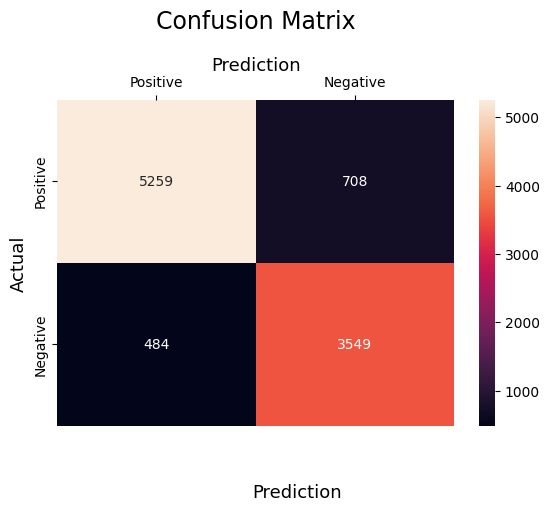

In [65]:
sns.heatmap(cm, annot=True, fmt='g', 
xticklabels=['Positive','Negative'], 
yticklabels=['Positive','Negative']) 
plt.ylabel('Actual', fontsize=13) 
plt.title('Confusion Matrix', fontsize=17, pad=20) 
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13) 
plt.gca().xaxis.tick_top() 
plt.gca().figure.subplots_adjust(bottom=0.2) 
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13) 
plt.show()